In [124]:
import pandas as pd
import os
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import roc_curve
import lightgbm as lgb
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from collections import Counter
import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
from catboost import CatBoostClassifier
import random
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

In [125]:
place = 'try1.txt'
train = pd.read_csv(place, sep='\t')
print(train.shape)

(18618, 35)


In [126]:
train = train.dropna(axis=0)
print(train.shape)

(15342, 35)


In [127]:
train.index = list(range(15342))

In [128]:
train.head()

,性别,fld,年龄,白细胞总数,甘油三酯,谷丙转氨酶,谷草转氨酶,红细胞压积,红细胞总数,肌酐,...,舒张压,体重,体重指数,臀围,血小板压积,腰臀比,腰围,中性粒细胞百分比,age,bmir
0,0,0,20,5.96,0.62,8.0,15.0,37.1,4.27,59.5,...,70.0,55.0,19.7,85.0,0.23,0.75,64.0,63.5,1,2
1,0,0,20,6.10,0.79,10.0,16.0,39.0,4.28,59.7,...,70.0,46.0,19.7,85.0,0.26,0.69,59.0,59.0,1,2
2,0,0,20,7.67,1.72,17.0,16.0,41.1,5.01,67.4,...,70.0,60.0,23.7,96.0,0.19,0.79,76.0,44.2,1,2
3,0,0,20,4.80,2.12,10.0,12.0,42.1,4.97,62.2,...,70.0,57.0,18.8,84.0,0.18,0.81,68.0,58.2,1,2
4,0,0,20,10.94,0.72,12.0,16.0,43.6,5.29,61.1,...,80.0,62.0,24.8,89.0,0.28,0.79,70.0,70.0,1,3


In [129]:
train.columns

Index(['性别', 'fld', '年龄', '白细胞总数', '甘油三酯', '谷丙转氨酶', '谷草转氨酶', '红细胞压积', '红细胞总数',
       '肌酐', '尿素氮', '尿酸', '平均红细胞体积', '平均红细胞血红蛋白含量', '平均红细胞血红蛋白浓度', '血红蛋白',
       '血糖', '血小板数', '总胆固醇', '低密度脂蛋白', '高密度脂蛋白', '红细胞体积分布宽度', '淋巴细胞百分比', '身高',
       '收缩压', '舒张压', '体重', '体重指数', '臀围', '血小板压积', '腰臀比', '腰围', '中性粒细胞百分比',
       'age', 'bmir'],
      dtype='object')

In [130]:
fea = train['性别']
A1 = fea[fea==1]; B1 = A1.index
A2 = fea[fea==0]; B2 = A2.index
X1 = train.iloc[B1, :]
X2 = train.iloc[B2, :]
X1['VAI'] = (X1['腰围']/(39.68+1.88*X1['体重指数'])) * (X1['甘油三酯']/1.03)*(1.31/X1['高密度脂蛋白'])
X2['VAI'] = (X2['腰围']/(36.58+1.89*X2['体重指数'])) * (X2['甘油三酯']/0.81)*(1.52/X2['高密度脂蛋白'])
train = pd.concat([X1,X2], axis=0)

F:\Tools\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\Tools\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


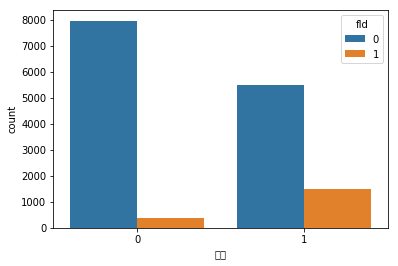

In [131]:
sns.countplot(x='性别', data=train, hue='fld')
plt.show()

In [132]:
#train["白红计数比"] = train["白细胞总数"]/train["红细胞总数"]
#train["红细胞总体积"] = train["平均红细胞体积"]*train["红细胞总数"]
#train['肾'] = train['肌酐'] + train['尿酸'] + train['尿素氮']
#train['总酶'] = train['谷草转氨酶'] + train['谷丙转氨酶']
#train['谷草酶ratio'] = train['谷草转氨酶']/np.maximum(train["总酶"].astype("float"),1)
#train['谷丙酶ratio'] = train['谷丙转氨酶']/np.maximum(train["总酶"].astype("float"),1)
#train['总蛋白'] = train["高密度脂蛋白"] + train["低密度脂蛋白"] + train['血红蛋白']
train['谷丙草比']=train['谷丙转氨酶']/train['谷草转氨酶']
train['高低蛋白比'] =  train["高密度脂蛋白"]/train["低密度脂蛋白"]
#train['谷丙草比lg']=np.log(train['谷丙转氨酶']/train['谷草转氨酶'])
train['非高密度脂蛋白'] = train['总胆固醇'] - train['高密度脂蛋白']#这个确实很有用0.002
#train['高密度脂蛋白胆固醇ratio'] = train['高密度脂蛋白']/np.maximum(train["总胆固醇"].astype("float"),1) 
#train['低密度脂蛋白胆固醇ratio'] = train['低密度脂蛋白']/np.maximum(train["总胆固醇"].astype("float"),1)
#train['甘三胆固比'] = train['甘油三酯']*train['总胆固醇']#有用0.006
#train['低高蛋白比'] = train["低密度脂蛋白"]/train["高密度脂蛋白"]#有用0.004
#train['低密度胆固比'] = train["低密度脂蛋白"]/train["总胆固醇"]
#train['甘三低蛋白差'] = train["低密度脂蛋白"]-train['甘油三酯']#有用0.004
#train['甘三高蛋白比'] = train["高密度脂蛋白"]-train['甘油三酯']
#train['非低密度脂蛋白'] = train['总胆固醇'] - train['低密度脂蛋白']

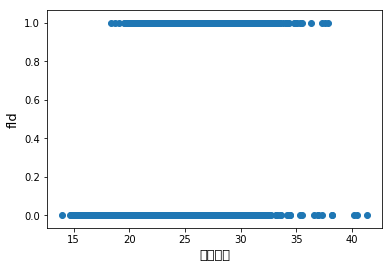

In [133]:
fig, ax = plt.subplots()
ax.scatter(x = train['体重指数'], y = train['fld'])
plt.ylabel('fld', fontsize=13)
plt.xlabel('体重指数', fontsize=13)
plt.show()

In [134]:
y = train['fld']
train = train.drop(['fld','bmir','age'],axis=1)
print(train.shape)
print(np.sum(y==0))
print(np.sum(y==1))

(15342, 36)
13459
1883


In [135]:
train.describe()

,性别,年龄,白细胞总数,甘油三酯,谷丙转氨酶,谷草转氨酶,红细胞压积,红细胞总数,肌酐,尿素氮,...,体重指数,臀围,血小板压积,腰臀比,腰围,中性粒细胞百分比,VAI,谷丙草比,高低蛋白比,非高密度脂蛋白
count,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,...,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000,15342.000000
mean,0.456199,39.933581,6.244497,1.162785,18.179051,18.951309,42.201669,4.780628,61.259085,4.732853,...,22.770278,93.967605,0.234791,0.814347,76.668361,57.334084,1.338338,0.926030,0.612128,3.260037
std,0.498094,13.180147,1.487790,0.816762,17.149062,9.457291,3.903698,0.448523,13.611893,1.237254,...,2.956973,6.393741,0.049773,0.063080,9.288124,7.929071,1.193146,0.327180,0.241804,0.834630
min,0.000000,20.000000,2.180000,0.160000,2.500000,2.000000,23.600000,2.780000,3.000000,1.100000,...,14.000000,51.000000,0.030000,0.600000,51.000000,21.940000,0.108932,0.151515,0.124862,0.000000
25%,0.000000,29.000000,5.200000,0.710000,11.100000,15.000000,39.500000,4.450000,50.800000,3.857000,...,20.700000,90.000000,0.200000,0.770000,70.000000,52.100000,0.720061,0.705882,0.447296,2.670000
50%,0.000000,37.000000,6.100000,0.970000,15.000000,17.600000,42.100000,4.750000,59.582500,4.607500,...,22.600000,94.000000,0.230000,0.810000,76.000000,57.400000,1.047950,0.863636,0.563453,3.170000
75%,1.000000,48.000000,7.060000,1.380000,21.000000,20.900000,45.100000,5.100000,70.400000,5.440000,...,24.600000,98.000000,0.260000,0.860000,83.000000,62.700000,1.579930,1.076923,0.721953,3.750000
max,1.000000,92.000000,23.900000,20.880000,1189.300000,606.100000,54.800000,7.740000,285.100000,20.580000,...,41.300000,140.000000,1.181000,1.200000,124.000000,90.110000,30.167754,8.000000,4.350877,9.970000


In [136]:
train.iloc[6588,:]

性别                1.000000
年龄               52.000000
白细胞总数             3.400000
甘油三酯              2.270000
谷丙转氨酶          1189.300000
谷草转氨酶           606.100000
红细胞压积            46.200000
红细胞总数             5.080000
肌酐               75.430000
尿素氮               4.598000
尿酸              401.400000
平均红细胞体积          90.900000
平均红细胞血红蛋白含量      30.100000
平均红细胞血红蛋白浓度     331.000000
血红蛋白            153.000000
血糖                5.430000
血小板数            264.000000
总胆固醇              4.700000
低密度脂蛋白            2.385000
高密度脂蛋白            0.890000
红细胞体积分布宽度        13.400000
淋巴细胞百分比          43.600000
身高              174.000000
收缩压             110.000000
舒张压              70.000000
体重               74.000000
体重指数             24.400000
臀围              100.000000
血小板压积             0.290000
腰臀比               0.860000
腰围               86.000000
中性粒细胞百分比         47.600000
VAI               3.260905
谷丙草比              1.962217
高低蛋白比             0.373166
非高密度脂蛋白           3.810000
Name: 14811, dtype: float64

In [137]:
X = np.array(train)
y = np.array(y)

In [138]:
skf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
clf = LogisticRegression()
score1 = []
score2 = []
Sensitivity = []
Specificity = []
auc = []
for train, test in skf.split(X,y):
    X_train,X_test=X[train],X[test]
    y_train,y_test=y[train],y[test]
    clf.fit(X_train, y_train)
    
    y_pred1 = clf.predict(X_train)
    accuracy1 = np.mean(y_train==y_pred1)
    score1.append(accuracy1)
    
    y_pred2 = clf.predict(X_test)
    accuracy2 = np.mean(y_test==y_pred2)
    score2.append(accuracy2)
    confusion = metrics.confusion_matrix(y_test, y_pred2)
    auc_ = metrics.roc_auc_score(y_test, y_pred2)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    auc.append(auc_)
score1 = np.array(score1)
score2 = np.array(score2)
Sensitivity = np.array(Sensitivity)
Specificity = np.array(Specificity)
auc = np.array(auc)
print('The accuracy on trainging set is:',np.mean(score1),'The accuracy on test set is:', np.mean(score2))
print('The Sensitivity is:', np.mean(Sensitivity), 'The Specificity is', np.mean(Specificity))
print('auc is:', np.mean(auc))

F:\Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\To

The accuracy on trainging set is: 0.885528491858118 The accuracy on test set is: 0.8852187246450732
The Sensitivity is: 0.228402566700439 The Specificity is 0.9771160039108027
auc is: 0.602759285305621


In [139]:
import pickle
pickle_in = open('gbm.pickle','rb')
clf = pickle.load(pickle_in)

F:\Tools\Anaconda\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.1 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [140]:
skf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
score1 = []
score2 = []
Sensitivity = []
Specificity = []
auc = []
A = []
for train, test in skf.split(X,y):
    X_train,X_test=X[train],X[test]
    y_train,y_test=y[train],y[test]
    clf.fit(X_train, y_train)
    
    y_pred1 = clf.predict(X_train)
    accuracy1 = np.mean(y_train==y_pred1)
    score1.append(accuracy1)
    
    y_pred2 = clf.predict(X_test)
    accuracy2 = np.mean(y_test==y_pred2)
    score2.append(accuracy2)
    confusion = metrics.confusion_matrix(y_test, y_pred2)
    auc_ = metrics.roc_auc_score(y_test, y_pred2)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    auc.append(auc_)
    A.append(clf.booster_.feature_importance())
score1 = np.array(score1)
score2 = np.array(score2)
Sensitivity = np.array(Sensitivity)
Specificity = np.array(Specificity)
auc = np.array(auc)
print('The accuracy on trainging set is:',np.mean(score1),'The accuracy on test set is:', np.mean(score2))
print('The Sensitivity is:', np.mean(Sensitivity), 'The Specificity is', np.mean(Specificity))
print('auc is:', np.mean(auc))

The accuracy on trainging set is: 0.7511768655382615 The accuracy on test set is: 0.7340626356010146
The Sensitivity is: 0.8427783406506812 The Specificity is 0.7188500693228457
auc is: 0.7808142049867632


In [141]:
skf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
clf = lgb.LGBMClassifier(class_weight={1:8,0:1},categorical_features=[0],
                        colsample_bytree=0.8,num_leaves=9,reg_alpha=14,reg_lambda=14,
                         min_child_samples=3, importance_type='split')
score1 = []
score2 = []
Sensitivity = []
Specificity = []
auc = []
A = []
for train, test in skf.split(X,y):
    X_train,X_test=X[train],X[test]
    y_train,y_test=y[train],y[test]
    clf.fit(X_train, y_train)
    
    y_pred1 = clf.predict(X_train)
    accuracy1 = np.mean(y_train==y_pred1)
    score1.append(accuracy1)
    
    y_pred2 = clf.predict(X_test)
    accuracy2 = np.mean(y_test==y_pred2)
    score2.append(accuracy2)
    confusion = metrics.confusion_matrix(y_test, y_pred2)
    auc_ = metrics.roc_auc_score(y_test, y_pred2)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    auc.append(auc_)
    A.append(clf.booster_.feature_importance())
score1 = np.array(score1)
score2 = np.array(score2)
Sensitivity = np.array(Sensitivity)
Specificity = np.array(Specificity)
auc = np.array(auc)
print('The accuracy on trainging set is:',np.mean(score1),'The accuracy on test set is:', np.mean(score2))
print('The Sensitivity is:', np.mean(Sensitivity), 'The Specificity is', np.mean(Specificity))
print('auc is:', np.mean(auc))

The accuracy on trainging set is: 0.7670664662820792 The accuracy on test set is: 0.7488587673177338
The Sensitivity is: 0.8220449172576831 The Specificity is 0.7386139849864944
auc is: 0.7803294511220888


In [142]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [143]:
skf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
clf = LogisticRegression(class_weight={1:7.5,0:1})
score1 = []
score2 = []
Sensitivity = []
Specificity = []
auc = []
for train, test in skf.split(X,y):
    X_train,X_test=X[train],X[test]
    y_train,y_test=y[train],y[test]
    clf.fit(X_train, y_train)
    
    y_pred1 = clf.predict(X_train)
    accuracy1 = np.mean(y_train==y_pred1)
    score1.append(accuracy1)
    
    y_pred2 = clf.predict(X_test)
    accuracy2 = np.mean(y_test==y_pred2)
    score2.append(accuracy2)
    confusion = metrics.confusion_matrix(y_test, y_pred2)
    auc_ = metrics.roc_auc_score(y_test, y_pred2)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    auc.append(auc_)
score1 = np.array(score1)
score2 = np.array(score2)
Sensitivity = np.array(Sensitivity)
Specificity = np.array(Specificity)
auc = np.array(auc)
print('The accuracy on trainging set is:',np.mean(score1),'The accuracy on test set is:', np.mean(score2))
print('The Sensitivity is:', np.mean(Sensitivity), 'The Specificity is', np.mean(Specificity))
print('auc is:', np.mean(auc))

F:\Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\To

The accuracy on trainging set is: 0.7665522191614264 The accuracy on test set is: 0.7654150884954235
The Sensitivity is: 0.8119694922886411 The Specificity is 0.7588983467467976
auc is: 0.7854339195177193
